In [ ]:
#Load all necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from collections import Counter, defaultdict
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
from scipy.stats import randint as sp_randint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
import gc

In [2]:
gc.collect()

11

In [ ]:
#loading the data

In [3]:
train = pd.read_csv("D:\\Aj\\Data-Science-Assignment-master\\Project3_Prudential_Life_Insurance_Assessment\\train.csv")
train.shape

(59381, 128)

In [5]:
train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [ ]:
#Data Exploration

In [6]:
#Check for type of variables
train.dtypes.value_counts()

int64      109
float64     18
object       1
dtype: int64

In [ ]:
#Exploring Missing values

In [8]:
missing_info_df = pd.DataFrame(train.isna().sum())

In [9]:
missing_info_df.columns = ['missing_num']
missing_info_df['variable_name'] = missing_info_df.index
missing_info_df.index = range(0, len(missing_info_df))

In [10]:
missing_info_df['percentage_missing'] = missing_info_df['missing_num'].apply(lambda x: (x/59381)*100 )

In [11]:
missing_info_df[missing_info_df['missing_num']>0]

,missing_num,variable_name,percentage_missing
12,19,Employment_Info_1,0.031997
15,6779,Employment_Info_4,11.416110
17,10854,Employment_Info_6,18.278574
29,25396,Insurance_History_5,42.767889
34,28656,Family_Hist_2,48.257860
35,34241,Family_Hist_3,57.663226
36,19184,Family_Hist_4,32.306630
37,41811,Family_Hist_5,70.411411
38,8889,Medical_History_1,14.969435
47,58824,Medical_History_10,99.061990


In [ ]:
#Data Pre-processing

In [ ]:
#Missing vlaues

In [12]:
#There are missing values more 90 percent or 3 variables. 
#These three varaibles are removed from analysis after checking correlation with output variable.

In [13]:
print(train['Response'].corr(train['Medical_History_24']))
print(train['Response'].corr(train['Medical_History_32']))
print(train['Response'].corr(train['Medical_History_10']))

0.013383700625643532
0.14453572606401185
0.029198860341542395


In [14]:
train = train.drop(['Id', 'Medical_History_24', 'Medical_History_32', 'Medical_History_10'], axis=1)

In [15]:
train.shape

(59381, 124)

In [16]:
#The remaing missing values are further analysed before treatment
missing_vals = ['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
               'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3',
               'Family_Hist_4', 'Family_Hist_5', 'Medical_History_1', 'Medical_History_15']

train[missing_vals].head()

,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_15
0,0.028,0.0,NaN,0.000667,NaN,0.598039,NaN,0.526786,4.0,240.0
1,0.000,0.0,0.0018,0.000133,0.188406,NaN,0.084507,NaN,5.0,0.0
2,0.030,0.0,0.0300,NaN,0.304348,NaN,0.225352,NaN,10.0,NaN
3,0.042,0.0,0.2000,NaN,0.420290,NaN,0.352113,NaN,0.0,NaN
4,0.027,0.0,0.0500,NaN,0.463768,NaN,0.408451,NaN,NaN,NaN


In [17]:
#mode imputation
train['Medical_History_1'].fillna(1.0, inplace = True) 
train['Medical_History_15'].fillna(240.0, inplace = True) 

In [18]:
#The rest of mean values are mean imputed
train.fillna(train.mean(), inplace=True)

In [19]:
train['Product_Info_2'].value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

In [ ]:
#Dealing categorical variables

In [20]:
#converting onject types to cat codes
train['Product_Info_2'] = train['Product_Info_2'].astype('category').cat.codes

In [21]:
train.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
1,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
2,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
3,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
4,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


Text(0,0.5,'Mean Distribution')

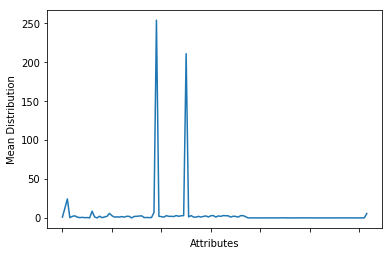

In [22]:
#Data Distribution analysis
train.mean().plot();
plt.xlabel("Attributes")
plt.ylabel("Mean Distribution")

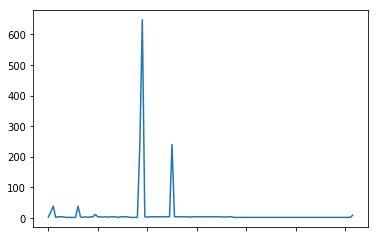

In [23]:
train.max().plot();

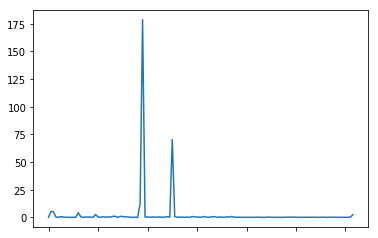

In [24]:
train.std().plot();

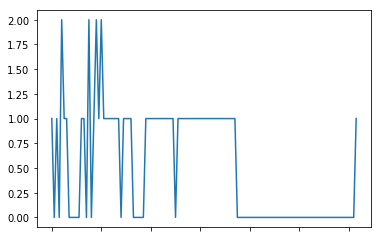

In [25]:
train.min().plot()

In [26]:
 train.dtypes.value_counts()

int64      108
float64     15
int8         1
dtype: int64

In [27]:
train.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
1,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
2,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
3,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
4,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


In [28]:
data_info_df =  pd.DataFrame(train.apply(lambda x : len(x.unique())))

data_info_df.columns = ['unique_values']
data_info_df['variable_name'] = data_info_df.index
data_info_df.index = range(0, len(data_info_df))

In [29]:
data_info_df[data_info_df['unique_values']>2].head(35)

,unique_values,variable_name
1,19,Product_Info_2
2,34,Product_Info_3
3,1491,Product_Info_4
6,3,Product_Info_7
7,65,Ins_Age
8,39,Ht
9,300,Wt
10,3256,BMI
11,1937,Employment_Info_1
12,36,Employment_Info_2


In [ ]:
#One-hot encoding

In [30]:
encoding_variables = ['Product_Info_7', 'InsuredInfo_1', 'InsuredInfo_3', 'Insurance_History_2',
                     'Insurance_History_3', 'Insurance_History_4','Insurance_History_7', 
                     'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1',
                     'Medical_History_3', 'Medical_History_5','Medical_History_6',
                     'Medical_History_7', 'Medical_History_8', 'Medical_History_9',
                     'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14',
                     'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 'Medical_History_19',
                     'Medical_History_20', 'Medical_History_21', 'Medical_History_23', 'Medical_History_25',
                     'Medical_History_26', 'Medical_History_27', 'Medical_History_28', 'Medical_History_29',
                     'Medical_History_30','Medical_History_31', 'Medical_History_34', 'Medical_History_35', 'Medical_History_36',
                     'Medical_History_37', 'Medical_History_39', 'Medical_History_40', 'Medical_History_41']

In [31]:
train[encoding_variables].head()

,Product_Info_7,InsuredInfo_1,InsuredInfo_3,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,...,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_39,Medical_History_40,Medical_History_41
0,1,1,6,1,3,1,1,1,2,2,...,3,2,3,3,1,2,2,3,3,3
1,1,1,6,1,3,1,1,3,2,2,...,3,2,3,1,1,2,2,3,3,1
2,1,1,8,1,1,3,3,2,3,3,...,3,2,3,3,1,3,2,3,3,1
3,1,2,8,1,1,3,3,2,3,3,...,3,2,3,3,1,2,2,3,3,1
4,1,1,6,1,1,3,3,2,3,2,...,3,2,3,3,1,3,2,3,3,1


In [32]:
train_encoded = pd.get_dummies(train, columns=encoding_variables)
print(train.shape)
print(train_encoded.shape)

(59381, 124)
(59381, 214)


In [33]:
train.groupby('Response').describe()

BMI                                                              \
            count      mean       std       min       25%       50%       75%   
Response                                                                        
1          6207.0  0.509306  0.147606  0.157533  0.411218  0.483174  0.581357   
2          6552.0  0.546909  0.157569  0.172904  0.428780  0.510582  0.644253   
3          1013.0  0.515884  0.119768  0.231899  0.422093  0.510582  0.608671   
4          1428.0  0.417773  0.075936  0.158136  0.362643  0.419655  0.475466   
5          5432.0  0.570763  0.127321  0.058838  0.476249  0.591822  0.662158   
6         11233.0  0.490632  0.098622  0.164529  0.420178  0.489742  0.560019   
7          8027.0  0.464679  0.076837  0.182548  0.411370  0.470773  0.523539   
8         19489.0  0.393644  0.069260  0.000000  0.344016  0.394875  0.445169   

                   Employment_Info_1              ...    Product_Info_7       \
               max             count      mean    ...               75%  max   
Response                                          ...                          
1         1.000000            6207.0  0.067940    ...               1.0  3.0   
2         1.000000            6552.0  0.078758    ...               1.0  3.0   
3         0.855761            1013.0  0.062757    ...               1.0  3.0   
4         0.657559            1428.0  0.064233    ...               1.0  3.0   
5         1.000000            5432.0  0.067637    ...               1.0  3.0   
6         0.898982           11233.0  0.083585    ...               1.0  3.0   
7         0.925769            8027.0  0.085155    ...               1.0  3.0   
8         1.000000           19489.0  0.078199    ...               1.0  3.0   

               Wt                                                              \
            count      mean       std       min       25%       50%       75%   
Response                                                                        
1          6207.0  0.320000  0.102703  0.064854  0.246862  0.309623  0.372385   
2          6552.0  0.343303  0.107549  0.100418  0.267782  0.330544  0.414226   
3          1013.0  0.322870  0.086263  0.127615  0.257322  0.317992  0.382845   
4          1428.0  0.261289  0.064870  0.106695  0.215481  0.257322  0.309623   
5          5432.0  0.351056  0.093762  0.069038  0.288703  0.351464  0.414226   
6         11233.0  0.313090  0.073945  0.104603  0.265690  0.309623  0.361925   
7          8027.0  0.291532  0.065521  0.100418  0.246862  0.290795  0.336820   
8         19489.0  0.239846  0.060360  0.000000  0.194561  0.236402  0.284519   

                    
               max  
Response            
1         1.000000  
2         0.748954  
3         0.602510  
4         0.487448  
5         1.000000  
6         0.644351  
7         0.518828  
8         0.495816  

[8 rows x 984 columns]

In [ ]:
#Correlation Analysis

In [34]:
corr_df = pd.DataFrame(train.corr().abs().unstack().sort_values().drop_duplicates())

In [35]:
corr_df.tail(20)

0
Medical_Keyword_3   Medical_History_39   0.744524
Employment_Info_3   Employment_Info_2    0.760791
Employment_Info_5   Product_Info_3       0.764707
Insurance_History_8 Insurance_History_1  0.787723
Medical_Keyword_30  Medical_History_19   0.840947
Wt                  BMI                  0.854083
Medical_History_23  Medical_Keyword_15   0.864042
Insurance_History_4 Insurance_History_7  0.919526
                    Insurance_History_9  0.938654
Insurance_History_3 Insurance_History_4  0.949388
Medical_Keyword_11  Medical_History_37   0.950069
Medical_History_36  Medical_History_25   0.954110
Insurance_History_7 Insurance_History_9  0.962528
Medical_History_26  Medical_History_36   0.965349
Insurance_History_3 Insurance_History_7  0.974910
                    Insurance_History_9  0.982598
Medical_History_25  Medical_History_26   0.987910
Medical_History_33  Medical_Keyword_23   0.993030
Medical_Keyword_48  Medical_History_6    0.993101
Product_Info_1      Product_Info_1       1.000000

In [36]:
train.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
1,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
2,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
3,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
4,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


In [ ]:
#Modelling

In [ ]:
#Normalisation

In [135]:
def normalization(data):
    return (data - data.min())/(data.max() - data.min())

In [136]:
train.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
1,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
2,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
3,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
4,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


In [137]:
train = normalization(train)

In [ ]:
#Train-test split

In [37]:
#responce and predictor variables
x = train.drop(['Response'], axis=1)
y = train['Response']
x_encoded = train_encoded.drop(['Response'], axis=1)

In [38]:
x_train_encoded, x_test_encoded, y_train_encoded, y_test_encoded = train_test_split(x_encoded, y, 
                                                    test_size=0.2, stratify = y,
                                                    random_state=0)

x_train_encoded.shape, x_test_encoded.shape, y_train_encoded.shape, y_test_encoded.shape

((47504, 213), (11877, 213), (47504,), (11877,))

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, stratify = y,
                                                    random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((47504, 123), (11877, 123), (47504,), (11877,))

In [40]:
x_train.index = range(0, len(x_train))
y_train.index = range(0, len(y_train))

x_test.index = range(0, len(x_test))
y_test.index = range(0, len(y_test))

x_train_encoded.index = range(0, len(x_train_encoded))
y_train_encoded.index = range(0, len(y_train_encoded))

x_test_encoded.index = range(0, len(x_test_encoded))
y_test_encoded.index = range(0, len(y_test_encoded))

In [ ]:
#Hyper Parameter tuning

In [41]:
def tune_parameters(clf, parameter_grid, x,y, num_splits = 5):
    cross_validation = StratifiedKFold(n_splits=num_splits, shuffle=False)
    clf = GridSearchCV(clf, param_grid=parameter_grid, cv=cross_validation,n_jobs=-1)
    train_score =[]
    cv_score = []
    model_params = []
    k_fold = KFold(n_splits = num_splits)
    for train_indices, test_indices in k_fold.split(x):
        clf.fit(x.loc[train_indices], y.loc[train_indices])
        cv_score.append(clf.score(x.loc[test_indices], y.loc[test_indices]))
        train_score.append(clf.score(x.loc[train_indices], y.loc[train_indices]))
        print('Best parameters:', clf.best_params_,
              'Fold Train accuracy', train_score[-1],
              'Fold test accuracy:', cv_score[-1])
        model_params.append(clf.best_params_)
    print('Average cv accuracy:', np.mean(cv_score))
    #saving all the best parameters
    d = defaultdict(list)
    for i in model_params:
        for key, value in i.items():
            d[key].append(value)
    d = dict(d)
    #finding the mode of best parameters
    final_most_repeated_params = {k: Counter(v).most_common(1)[0][0] for k, v in d.items()}
    print('Overall best parameters are: ', final_most_repeated_params)
    return final_most_repeated_params

In [42]:
gc.collect()

7416

In [ ]:
#Random Forest

In [43]:
param_grid = {"max_depth": [20,50, None],
              "max_features": [ 20,40, 60],
              "min_samples_split": [20, 40, 60],
              "bootstrap": [True, False],
              }


rf_clf = RandomForestClassifier(n_estimators=20)
rf_params = tune_parameters(rf_clf, param_grid, x_train, y_train)

Best parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 40, 'min_samples_split': 60} Fold Train accuracy 0.6913138436439229 Fold test accuracy: 0.5707820229449532
Best parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 40, 'min_samples_split': 60} Fold Train accuracy 0.6891824329658185 Fold test accuracy: 0.5700452583938532
Best parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 40, 'min_samples_split': 40} Fold Train accuracy 0.7879377943846538 Fold test accuracy: 0.5756236185664667
Best parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 40, 'min_samples_split': 40} Fold Train accuracy 0.7894639896850248 Fold test accuracy: 0.5661509314808968
Best parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 40, 'min_samples_split': 40} Fold Train accuracy 0.7877591832438691 Fold test accuracy: 0.5596842105263158
Average cv accuracy: 0.5684572083824971
Overall best parameters are:  {'bootstrap': False, 'max_depth': 50, 'm

In [ ]:
#Overall best parameters are:  {'bootstrap': False, 'max_depth': 50, 'max_features': 40, 'min_samples_split': 40}

In [105]:
rf_params

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 40,
 'min_samples_split': 40}

In [138]:
#Saving output to a file
with open('RandomForest_params.txt', 'w') as f:
    print(rf_params, file=f)

In [44]:
dt_clf = DecisionTreeClassifier(random_state=0)
parameter_grid = {'max_depth': range(5,55,10),
                 'min_samples_split' : range(5,105,20),
                  'min_samples_leaf' : range(5, 50, 15)
                 }
dt_params = tune_parameters(dt_clf, parameter_grid, x_train, y_train)

Best parameters: {'max_depth': 15, 'min_samples_leaf': 20, 'min_samples_split': 85} Fold Train accuracy 0.5929005604820672 Fold test accuracy: 0.5402589201136723
Best parameters: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 85} Fold Train accuracy 0.604715417203905 Fold test accuracy: 0.541732449215872
Best parameters: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 85} Fold Train accuracy 0.6037944372812672 Fold test accuracy: 0.5482580780970424
Best parameters: {'max_depth': 15, 'min_samples_leaf': 35, 'min_samples_split': 85} Fold Train accuracy 0.5872431123858642 Fold test accuracy: 0.5401536680349437
Best parameters: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 85} Fold Train accuracy 0.6081465108935902 Fold test accuracy: 0.5414736842105263
Average cv accuracy: 0.5423753599344113
Overall best parameters are:  {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 85}


In [ ]:
#Overall best parameters are:  {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 85}

In [139]:
#Saving output to a file
with open('DecisionTrees_params.txt', 'w') as f:
    print(dt_params, file=f)

In [45]:
svm_clf = SVC()
parameter_grid = {   
                  'kernel':('linear', 'rbf'), 'C':(1,0.25,10),'gamma': (1,2,3,'auto')
                 }

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100]}]

svm_params = tune_parameters(svm_clf, parameter_grid, x_train, y_train)

In [ ]:
#Overall best parameters are: {'C': 1000.0, 'gamma' :1.0, 'kernel': rbf}

In [155]:
#Saving output to a file
with open('svm_params.txt', 'w') as f:
    print(svm_params, file=f)

In [ ]:
#Voting Classifier

In [46]:
def vote_classfier(x,y):
    kfold = model_selection.KFold(n_splits=3, random_state=0)
    # create the sub models
    estimators = []
    model1 = RandomForestClassifier()
    estimators.append(('logistic', model1))
    model2 = DecisionTreeClassifier(max_depth= 7, min_samples_split=5)
    estimators.append(('cart', model2))
    model3 = SVC()
    estimators.append(('svm', model3))
    
    ensemble = VotingClassifier(estimators)
    results = model_selection.cross_val_score(ensemble, x, y, cv=kfold)
    print(results.mean())
    return ensemble

In [47]:
#Building models with best parameters
svm_model = SVC()

dt_model =  DecisionTreeClassifier()

rf_model = RandomForestClassifier(bootstrap = False, 
                                  max_depth = None, 
                                  max_features= 10,
                                  min_samples_split = 10)

ensemble = vote_classfier(x_train, y_train)

0.5155354673913518


In [ ]:
#Model Fitting

In [48]:
svm_model.fit(x_train, y_train)
dt_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)
ensemble.fit(x_train, y_train)

VotingClassifier(estimators=[('logistic', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [ ]:
#Model Prediction on test data

In [49]:
y_test_svm = svm_model.predict(x_test)

y_test_rf = rf_model.predict(x_test)

y_test_dt = dt_model.predict(x_test)

y_test_ensemble = ensemble.predict(x_test)

In [ ]:
#Plotting confusion matrix

In [79]:
class_labels = ['1', '2', '3', '4', '5', '6', '7', '8']
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    

In [ ]:
#Model Performance Evaluation

In [148]:
def model_evaluation(y_test,y_test_rf,y_test_dt,y_test_svm,y_test_ensemble):
   
    
    print("Accuracy score for Random Forest model:", accuracy_score(y_test,y_test_rf))
    print("F1 score for Random Forest model::",f1_score(y_test, y_test_rf,average='weighted'))
    print("precision score for Random Forest model::",precision_score(y_test, y_test_rf,average='weighted'))
    print("recall score for Random Forest model::",recall_score(y_test, y_test_rf,average='weighted'))
    
    
    print("Accuracy score for Decision Trees:", accuracy_score(y_test,y_test_dt))
    print("F1 score for Decision Trees::",f1_score(y_test, y_test_dt,average='weighted'))
    print("precision score for Decision Trees::",precision_score(y_test, y_test_dt,average='weighted'))
    print("recall score for Decision Trees::",recall_score(y_test, y_test_dt,average='weighted'))
    
    
    print("Accuracy score for SVM:", accuracy_score(y_test,y_test_svm))
    print("F1 score for SVM::",f1_score(y_test, y_test_svm,average='weighted'))
    print("precision score for SVM::",precision_score(y_test, y_test_svm,average='weighted'))
    print("recall score for SVM::",recall_score(y_test, y_test_svm,average='weighted'))
    
    
    print("Accuracy score for Ensemble model:", accuracy_score(y_test,y_test_ensemble))
    print("F1 score for Ensemble model::",f1_score(y_test, y_test_ensemble,average='weighted'))
    print("precision score for Ensemble model::",precision_score(y_test, y_test_ensemble,average='weighted'))
    print("recall score for Ensemble model::",recall_score(y_test, y_test_ensemble,average='weighted'))

In [149]:
model_evaluation(y_test,y_test_rf,y_test_dt,y_test_svm,y_test_ensemble)

Accuracy score for Random Forest model: 0.5404563441946619
F1 score for Random Forest model:: 0.5148297689511805
precision score for Random Forest model:: 0.5106769994904317
recall score for Random Forest model:: 0.5404563441946619
Accuracy score for Decision Trees: 0.43815778395217647
F1 score for Decision Trees:: 0.43836482158089835
precision score for Decision Trees:: 0.43866084883443346
recall score for Decision Trees:: 0.43815778395217647
Accuracy score for SVM: 0.4070051359770986
F1 score for SVM:: 0.3260267819436596
precision score for SVM:: 0.34884795333984797
recall score for SVM:: 0.4070051359770986
Accuracy score for Ensemble model: 0.5227751115601583
F1 score for Ensemble model:: 0.49540741151124323
precision score for Ensemble model:: 0.49550302098378646
recall score for Ensemble model:: 0.5227751115601583


In [ ]:
#Result Plots

In [96]:
def plot_my_results(y_true, y_test):
    #confusion_matrix(y_true, y_test,labels=class_labels)
    #cnf_matrix = confusion_matrix(y_true, y_test,labels=class_labels)
    cnf_matrix = confusion_matrix(y_true, y_test)
    np.set_printoptions(precision=2)
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_labels,
                          title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[ 234  189   21   41  100  267  127  262]
 [ 164  309   16   25  164  278  107  247]
 [  25   19   74   46   11   15    3   10]
 [  18    1   16  191    0   24    7   29]
 [  68  110    1    0  530  216   62   99]
 [ 122  109    1    9  104 1123  258  521]
 [  65   41    0    1   21  400  524  554]
 [  18   16    0    0    9  247  174 3434]]


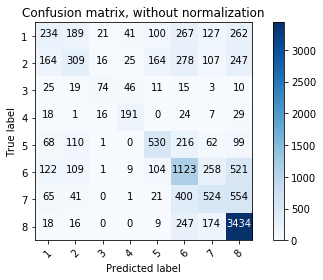

In [97]:
plot_my_results(y_test, y_test_rf)

Confusion matrix, without normalization
[[ 263  202   29   34  143  225  149  196]
 [ 241  317   26   19  176  229  129  173]
 [  41   30   68   33   10   11    3    7]
 [  35   23   36  143    2   15    7   25]
 [ 131  149   22    2  487  159   60   76]
 [ 243  237    9   24  176  854  328  376]
 [ 150  132    3   11   55  332  489  434]
 [ 181  174    4   24   91  409  432 2583]]


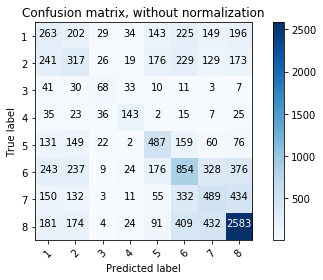

In [98]:
plot_my_results(y_test, y_test_dt)

Confusion matrix, without normalization
[[ 168   83   17   51   16  269   66  571]
 [ 115   93   12   37   12  312   92  637]
 [  21   15   26   93    1   13    2   32]
 [  27   12   31  141    0   21    0   54]
 [  47   40    0    0   24  201   60  714]
 [  81   72    1    7   13  684  115 1274]
 [  57   29    1    0   14  304  142 1059]
 [  20   27    0    0    6  239   50 3556]]


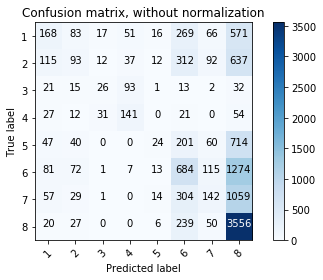

In [99]:
plot_my_results(y_test, y_test_svm)

Confusion matrix, without normalization
[[ 309  173   20   33   77  233   75  321]
 [ 222  328   20   15  120  226   74  305]
 [  51   12   73   37    9   10    3    8]
 [  37   12   34  151    1   18    2   31]
 [ 117  178    2    0  481  167   26  115]
 [ 214  160    4    9  152 1007  150  551]
 [ 104   74    1    2   34  420  367  604]
 [  26   21    0    0   14  246   98 3493]]


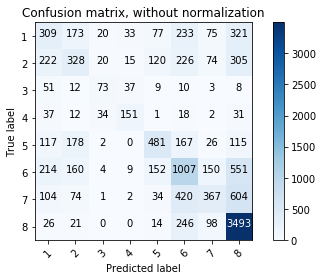

In [100]:
plot_my_results(y_test, y_test_ensemble)

In [ ]:
#encoded Data

In [61]:
svm_model.fit(x_train_encoded, y_train_encoded)
dt_model.fit(x_train_encoded, y_train_encoded)
rf_model.fit(x_train_encoded, y_train_encoded)
ensemble.fit(x_train_encoded, y_train_encoded)

y_test_svm_encoded = svm_model.predict(x_test_encoded)

y_test_rf_encoded = rf_model.predict(x_test_encoded)

y_test_dt_encoded = dt_model.predict(x_test_encoded)

y_test_ensemble_encoded = ensemble.predict(x_test_encoded)

In [145]:
model_evaluation(y_test,y_test_rf_encoded,y_test_dt_encoded,y_test_svm_encoded,y_test_ensemble_encoded)

Accuracy score for : 0.5200808284920434
F1 score for NN:: 0.4938859114252515
precision score for NN:: 0.48952522307524327
recall score for NN:: 0.5200808284920434
Accuracy score for SOAM1: 0.4357160899216974
F1 score for SOAM1:: 0.43580014221358837
precision score for SOAM1:: 0.43590673424494686
recall score for SOAM1:: 0.4357160899216974
Accuracy score for SOAM3: 0.40978361539109204
F1 score for SOAM3:: 0.3245826060510015
precision score for SOAM3:: 0.3518471534121449
recall score for SOAM3:: 0.40978361539109204
Accuracy score for SOAM3: 0.5218489517554938
F1 score for SOAM3:: 0.4939387568156733
precision score for SOAM3:: 0.495565729279947
recall score for SOAM3:: 0.5218489517554938


Confusion matrix, without normalization
[[ 164   65   14   62   12  287   57  580]
 [ 103   84   10   45    9  344   78  637]
 [  14   15   18  115    0   14    1   26]
 [  25    8   33  156    0   22    1   41]
 [  47   30    0    0   15  220   56  718]
 [  80   53    0    8    7  709  107 1283]
 [  46   21    1    0   13  300  137 1088]
 [  22   19    0    0    5  231   37 3584]]


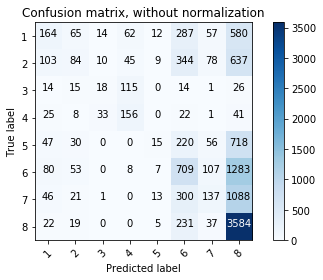

In [101]:
plot_my_results(y_test, y_test_svm_encoded)

Confusion matrix, without normalization
[[ 251  199   16   28   83  275  111  278]
 [ 175  285   13   11  175  269  113  269]
 [  29   21   66   38   11   25    3   10]
 [  23    9   15  148    0   38   13   40]
 [  69  125    0    1  488  214   61  128]
 [ 132  109    2   15  116 1059  265  549]
 [  70   44    0    2   37  407  468  578]
 [  27   29    0    0   10  245  175 3412]]


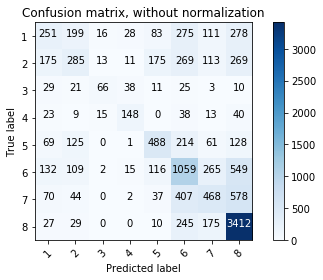

In [102]:
plot_my_results(y_test, y_test_rf_encoded)

Confusion matrix, without normalization
[[ 242  230   33   34  131  224  153  194]
 [ 225  300   28   19  185  233  135  185]
 [  49   27   66   33    9   10    3    6]
 [  38   30   39  135    2   14    8   20]
 [ 133  159   27    0  459  169   59   80]
 [ 231  226   10   24  173  860  326  397]
 [ 145  122    2   10   69  336  511  411]
 [ 212  195    3   34   72  396  384 2602]]


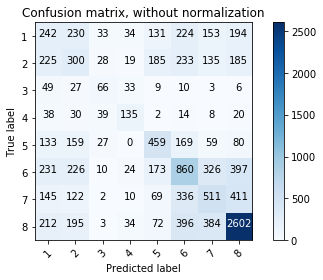

In [103]:
plot_my_results(y_test, y_test_dt_encoded)

Confusion matrix, without normalization
[[ 328  192   17   27   77  215   67  318]
 [ 232  348   18   18  106  218   66  304]
 [  46   24   65   36    9   11    1   11]
 [  35   10   27  164    0   15    1   34]
 [ 110  191    6    0  480  148   27  124]
 [ 218  193    7   12  136  971  143  567]
 [  97   82    1    1   51  403  343  628]
 [  17   24    1    0   14  253   90 3499]]


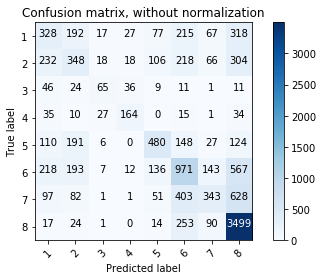

In [104]:
plot_my_results(y_test, y_test_ensemble_encoded)